A Monte Carlo simulation is a model used to predict the probability of different outcomes when the intervention of random variables is present.

Monte Carlo simulations help to explain the impact of risk and uncertainty in prediction and forecasting models.

The basis of a Monte Carlo simulation involves assigning multiple values to an uncertain variable to achieve multiple results and then averaging the results to obtain an estimate.

We start by importing the libraries.

### Predicting commissions example

Example drawn from this source:https://pbpython.com/monte-carlo.html 

In the example below, we predict how much money we should budget for sales commissions for the next year. This problem is useful for modeling because we have a defined formula for calculating commissions and we likely have some experience with prior years’ commissions payments.

This problem is also important from a business perspective. Sales commissions can be a large selling expense and it is important to plan appropriately for this expense. In addition, the use of a Monte Carlo simulation is a relatively simple improvement that can be made to augment what is normally an unsophisticated estimation process.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Let's assume that our historical percent to target performance is centered around a a mean of 100% and standard deviation of 10%. We can define those variables as well as the number of sales reps and simulations to model.

In [2]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

Using numpy, we can generate a list of percentages that can replicate our historical normal distribution.

In [3]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

We can now create variables for sales target and group them into buckets.

In [4]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

We now turn the data into a dataframe.

In [5]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

df.head()

,Pct_To_Target,Sales_Target,Sales
0,0.95,200000,190000.0
1,0.94,75000,70500.0
2,0.92,100000,92000.0
3,0.89,300000,267000.0
4,1.05,75000,78750.0


We define the function to calculate the commission rate as follows:

In [6]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

Now we can create the commission rate.

In [7]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.95,200000,190000.0,0.03,5700.0
1,0.94,75000,70500.0,0.03,2115.0
2,0.92,100000,92000.0,0.03,2760.0
3,0.89,300000,267000.0,0.02,5340.0
4,1.05,75000,78750.0,0.04,3150.0


Let's loop through the total number of iterations (1000).

In [8]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

Checking the results.

In [9]:
results_df = pd.DataFrame.from_records(all_stats, 
                                       columns=['Sales',
                                                'Commission_Amount',
                                                'Sales_Target'])

In [10]:
results_df.describe().round(2).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,809,651.25","2,861,709.79","83,800,875.0"
std,"2,663,403.65","100,852.14","2,624,350.08"
min,"75,713,750.0","2,559,232.0","75,475,000.0"
25%,"82,148,250.0","2,796,621.5","82,125,000.0"
50%,"83,773,500.0","2,863,180.0","83,775,000.0"
75%,"85,599,750.0","2,927,635.5","85,600,000.0"
max,"92,255,500.0","3,201,265.0","91,825,000.0"


In [11]:
#results_df.describe().round(2)

Other examples. Mainly drawn from this source: https://pub.towardsai.net/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8#8cf2

### The Coin Flip Example

Final value: 0.5


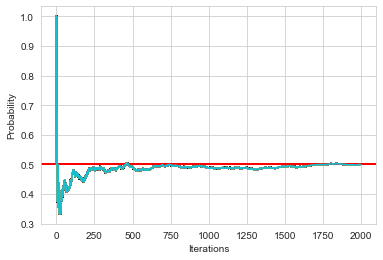

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt


#Coin flip
#0 --> Heads
#1 --> Tails

def coin_flip():
    return random.randint(0,1)

#coin_flip()


#Main function
list1 = []
def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result
        
        #Calculating probability value:
        prob_value = results/(i+1)
        
        #Append the probability values to the list:
        list1.append(prob_value)
        
        #Plot the results:
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(list1)
        
    return results/n


#Calling the function:

answer = monte_carlo(2000) #This can also be another number such as 5000
print("Final value:", answer)
        

### Monty Hall problem

What is the Monty Hall problem?

Imagine you are in a game show in which you can pick one of three doors: 
1. Behind one door is a car; 
2. behind the other doors, goats. 

You pick a door (e.g., door 1), and the host, who knows what’s behind the doors, opens another door, (e.g., door 3), which has a goat. The host then asks you: do you want to stick with your choice or choose another door?

The problem is this: Is it to your advantage to switch your choice of door?

Based on probability, it turns out it is to our advantage to switch the doors. But how and why? Let’s find out.


Essentially, after the host opens door 3, the probability of the last two doors of having a car increases to 2/3. Now we know that the third door has a goat, the probability of the second door having a car increases to 2/3. Hence, it is more advantageous to switch the doors.

Let's implement this scenario in Python.

Winning probability if you always switch: 0.657
Winning probability if you always stick to your original choice: 0.343


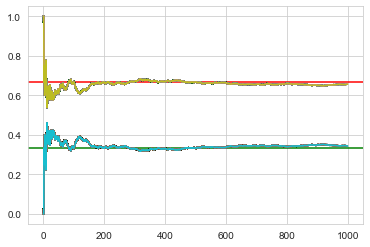

In [13]:
import random
import matplotlib.pyplot as plt

#1 - Car
#2 - Goats
doors = ["goat", "goat", "car"]

#Empty lists to store probability values:
switch_win_probability = []
stick_win_probability = []

plt.axhline(y=0.66666, color='r', linestyle='-')
plt.axhline(y=0.33333, color='g', linestyle='-')

#Monte Carlo Simulation
def monte_carlo(n):
    #calculating switch and stick wins:
    switch_wins = 0
    stick_wins = 0
    
    for i in range(n):
        
        
        #Randomly placing the car and goats behind the three doors:
        random.shuffle(doors)

        #contestant's choice:
        k = random.randrange(2)

        #If the contestant doesn't get car:
        if doors[k] != 'car':
            switch_wins += 1

        #If  the contestant got car:
        else:
            stick_wins += 1

        #Updating the list values:
        switch_win_probability.append(switch_wins/(i+1))
        stick_win_probability.append(stick_wins/(i+1))

        #Plotting the data
        plt.plot(switch_win_probability)
        plt.plot(stick_win_probability)

    #Print the probability values
    print('Winning probability if you always switch:', switch_win_probability[-1])
    print('Winning probability if you always stick to your original choice:', stick_win_probability[-1])


monte_carlo(1000)

In the figure above, after 1000 iterations, the winning probability for switching the door is 0.66. Thus, we are confident that it works to our advantage to switch the door -- at least, in this example.

Useful resources:
- https://pbpython.com/monte-carlo.html
- https://pub.towardsai.net/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8